# **Drug Repurposing using Knowledge Graph Embeddings**
Prince Ofuoku<br>
MSc Bioinformatics<br>
Teesside University<br>
2/4/2023<br>


## **Introduction**

**Knowledge graph embeddings** are a type of machine learning technique used to represent entities and relationships in a knowledge graph as dense, low-dimensional vectors (embedding vectors). 

The idea behind knowledge graph embeddings is to capture the underlying semantic meaning of the entities and relationships in the graph, so that similar entities are represented by similar vectors, and relationships between entities are captured by vector arithmetic. For example, in a TransE model, the head entity, tail entity and their relationship are represented as vectors *h*, *t* and *r*; such that ***h + r = t***


The process of generating knowledge graph embeddings involves training model to learn relationships between entities in a given knowledge graph, and then encode all the information as vectors for each entity and relation in the graph. The resulting embedding vectors can then be used for a variety of downstream tasks, such as link prediction, entity classification, and relation extraction.

The goal of **link prediction** is to predict the existence of a relationship between two entities in the knowledge graph that do not already have a relationship. For example, if the knowledge graph contains information about people, companies, and the jobs they hold, link prediction might be used to predict which person is most likely to be hired by a particular company. In the case of this study, the knowledge graph contains information about drugs, genes, diseases, phenotype and pathways; and the aim is to predict which drugs are likey to treat a disease.

The pyKeen package (https://pykeen.readthedocs.io/en/stable/) will be used to train different embedding models and the best one will be use for link prediction. PyKeen has an easy to use API implementaion for all the popular embedding models.

In [ ]:
!pip install pykeen

In [ ]:
import pkg_resources

pykeen_version = pkg_resources.get_distribution("pykeen").version
print("PyKEEN version:", pykeen_version)

PyKEEN version: 1.10.1


### Load Dataset from path
pykeen uses a stratified split. Default ratio is 80/20

In [ ]:
from pykeen.triples import TriplesFactory

fp = "/content/drive/MyDrive/Project/data/"

triples = TriplesFactory.from_path(path=fp+"triples_without_labels.tsv")
train_set, test_set = triples.split(random_state=42)

INFO:pykeen.utils:Using opt_einsum
INFO:pykeen.triples.splitting:done splitting triples to groups of sizes [848086, 219463]


This notebok is running on a GPU on google colab pro. Codes can run on CPU device but it will be very slow. The PyKeen package was built on top of Pytorch and has been optimise to run on cuda devise.

In [ ]:
!nvidia-smi

Fri Apr 28 05:30:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### TransE model

In [ ]:
from pykeen.pipeline import pipeline

transe_res = pipeline(
    training=train_set,
    testing=test_set,
    model='TransE',
    model_kwargs=dict(embedding_dim=128),
    loss='MarginRankingLoss',
    loss_kwargs=dict(margin=1),
    regularizer='LpRegularizer',
    regularizer_kwargs=dict(p=2, weight=1e-5),
    optimizer='Adam',
    optimizer_kwargs=dict(lr=1e-3),
    random_seed=1,
    device='gpu',
    training_kwargs=dict(num_epochs=50, batch_size=512),
    evaluator='RankBasedEvaluator',
    evaluator_kwargs=dict(metrics=['mean_rank', 'mean_reciprocal_rank', 'hits_at_k']))

INFO:pykeen.pipeline.api:Using device: gpu


Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=256.


Evaluating on cuda:0:   0%|          | 0.00/219k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 189.93s seconds


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

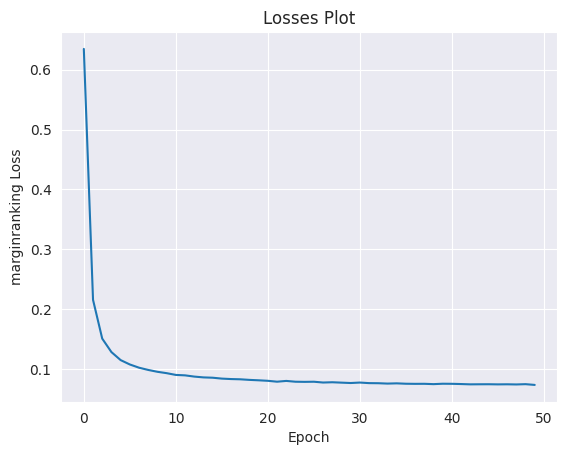

In [ ]:
transe_res.plot_losses()

In [ ]:
hits_at_10 = transe_res.get_metric("hits_at_10")
mean_rank = transe_res.get_metric("mean_rank")
mean_reciprocal_rank = transe_res.get_metric("mean_reciprocal_rank")

print("Hits@10:", hits_at_10)
print("Mean Rank (MR):", mean_rank)
print("Mean Reciprocal Rank (MRR):", mean_reciprocal_rank)

Hits@10: 0.2763882750167454
Mean Rank (MR): 668.0654296875
Mean Reciprocal Rank (MRR): 0.10878670960664749


### Visualise entity embeddings
- load entity2label dict from the earlier saved pickle file (see 1.1_preprocessing.ipynb)
- Get entity embeddings via the `entity_representations` method 
- Next, is to plot the embeddings with their labels to see if the model capture them correctly

In [ ]:
import pickle
import numpy as np

# Load the entity2label dictionary
with open(fp+"entity2label.pkl", "rb") as f:
    entity2label = pickle.load(f)

# Get the entity names (IDs) from the training dataset
entity_names = train_set.entity_id_to_label

# Extract the entity embeddings from the trained model
entity_embeddings = transe_res.model.entity_representations[0](indices=None).detach().cpu().numpy()


# Get the true labels in the same order as the embeddings
true_labels = [entity2label[entity] for entity in entity_names.values()]

### 2D Plot of Entity Embeddings
The embeddings are in 128D. `TSNE` reduces the dimension to 2D

<ipython-input-9-849f79f26319>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors, cmap=plt.cm.get_cmap("viridis", len(unique_labels)))


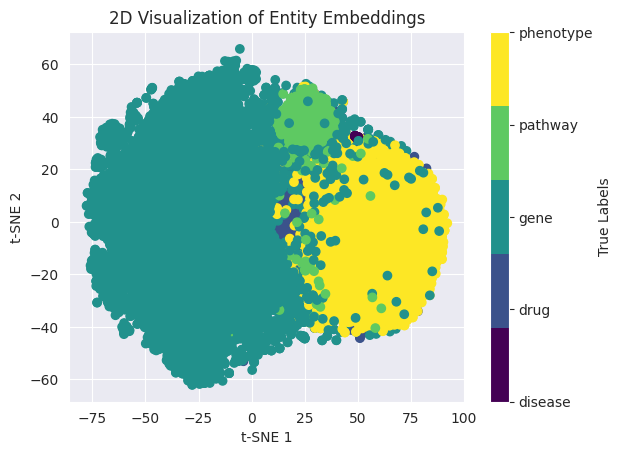

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reduce dimensionality to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(entity_embeddings)

# Create a color mapping for the true labels
unique_labels = sorted(set(true_labels))
color_mapping = {label: i for i, label in enumerate(unique_labels)}
colors = [color_mapping[label] for label in true_labels]

# Visualize the 2D embeddings with colors based on true labels
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors, cmap=plt.cm.get_cmap("viridis", len(unique_labels)))
plt.colorbar(ticks=range(len(unique_labels)), label="True Labels").set_ticklabels(unique_labels)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("2D Visualization of Entity Embeddings")
plt.show()


Entity types are clustered in same embedding space as expected. Let's expand the plot abit.

<ipython-input-14-d05b50b07ccf>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("viridis", len(unique_labels))


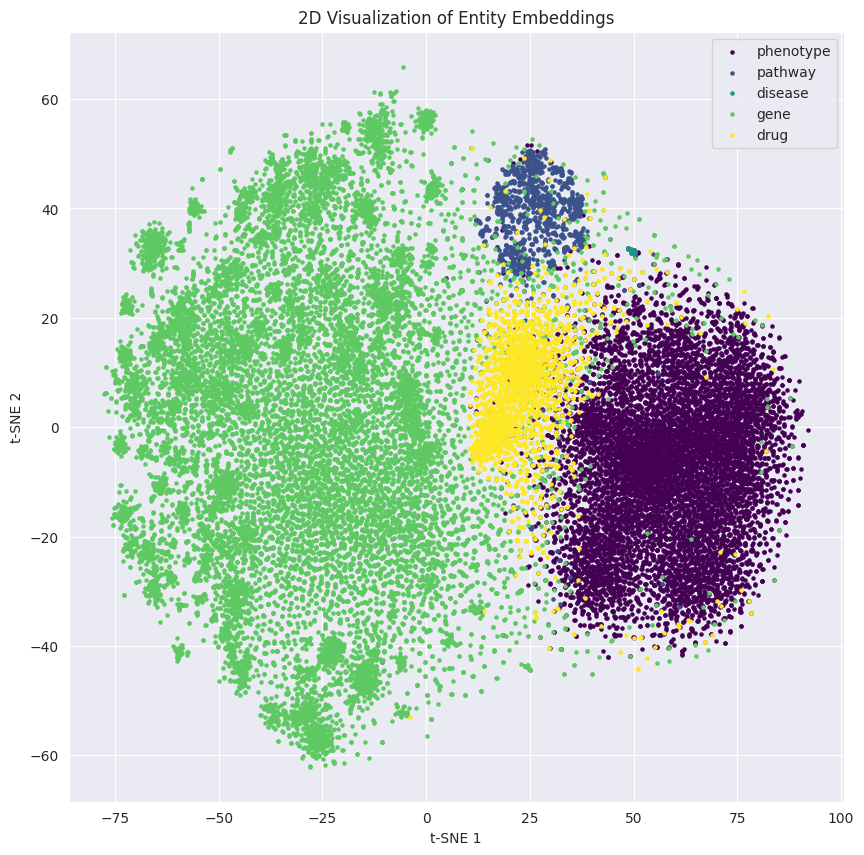

In [ ]:
# Get the unique labels and their corresponding colors
unique_labels = list(set(true_labels))
colors = plt.cm.get_cmap("viridis", len(unique_labels))

# Create a scatter plot of the embeddings with colors based on true_labels
fig, ax = plt.subplots(figsize=(10, 10))
for label, color in zip(unique_labels, colors.colors):
    mask = np.array(true_labels) == label
    ax.scatter(embeddings_2d[mask, 0], embeddings_2d[mask, 1], s=5, color=color, label=label)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("2D Visualization of Entity Embeddings")

ax.legend()
plt.show()


Beautiful! Lets try another color 

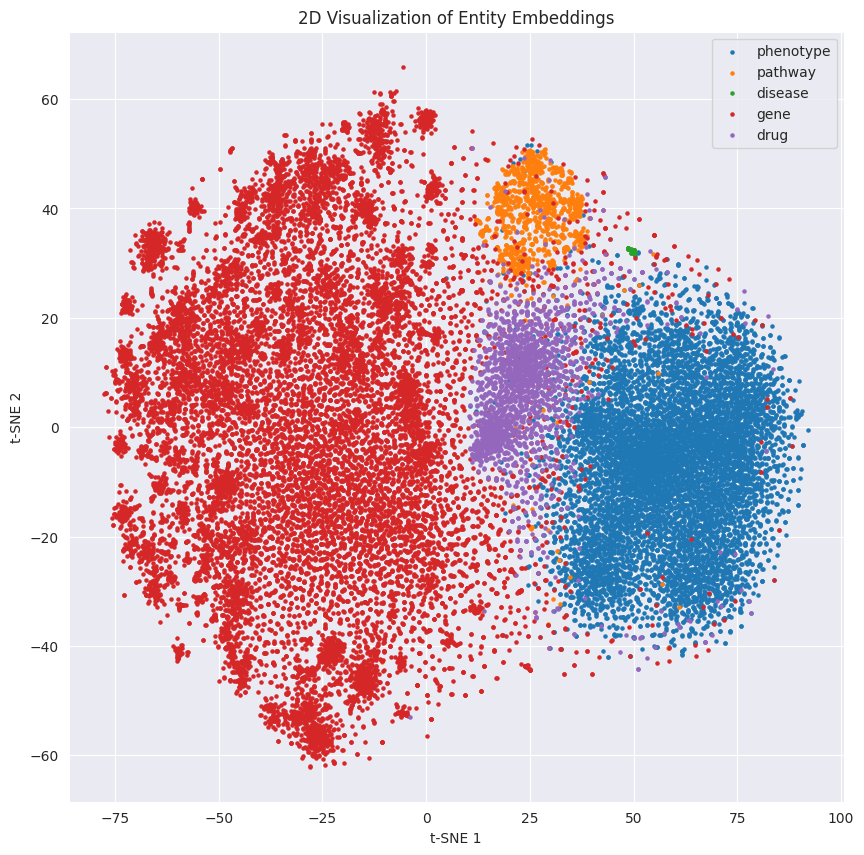

In [ ]:
unique_labels = list(set(true_labels))

fig, ax = plt.subplots(figsize=(10, 10))
for label in unique_labels:
    mask = np.array(true_labels) == label
    ax.scatter(embeddings_2d[mask, 0], embeddings_2d[mask, 1], s=5, label=label)

plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("2D Visualization of Entity Embeddings")
ax.legend()
plt.show()

### DistMult Model

In [ ]:
distmult_res = pipeline(
    training=train_set,
    testing=test_set,
    model='DistMult',
    model_kwargs=dict(embedding_dim=128),
    loss='MarginRankingLoss',
    loss_kwargs=dict(margin=1),
    regularizer='LpRegularizer',
    regularizer_kwargs=dict(p=2, weight=1e-5),
    optimizer='Adam',
    optimizer_kwargs=dict(lr=1e-3),
    random_seed=1,
    device='gpu',
    training_kwargs=dict(num_epochs=50, batch_size=512),
    evaluator='RankBasedEvaluator',
    evaluator_kwargs=dict(metrics=['mean_rank', 'mean_reciprocal_rank', 'hits_at_k']),
)

INFO:pykeen.pipeline.api:Using device: gpu


Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=256.


Evaluating on cuda:0:   0%|          | 0.00/219k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 188.68s seconds


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

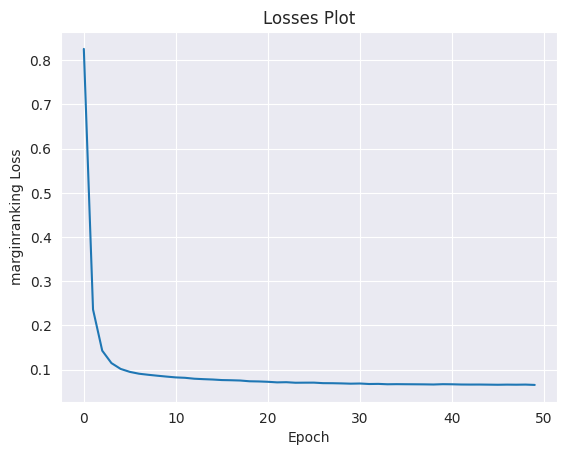

In [ ]:
distmult_res.plot_losses()

In [ ]:
hits_at_10 = distmult_res.get_metric("hits_at_k")
mean_rank = distmult_res.get_metric("mean_rank")
mean_reciprocal_rank = distmult_res.get_metric("mean_reciprocal_rank")

print("Hits@10:", hits_at_10)
print("Mean Rank (MR):", mean_rank)
print("Mean Reciprocal Rank (MRR):", mean_reciprocal_rank)

Hits@10: 0.2734424481575482
Mean Rank (MR): 695.89794921875
Mean Reciprocal Rank (MRR): 0.13010840117931366


### ComplEx Model

In [ ]:
# ComplEx model pipeline
complex_res = pipeline(
    training=train_set,
    testing=test_set,
    model='ComplEx',
    model_kwargs=dict(embedding_dim=128),
    loss='MarginRankingLoss',
    loss_kwargs=dict(margin=1),
    regularizer='LpRegularizer',
    regularizer_kwargs=dict(p=2, weight=1e-5),
    optimizer='Adam',
    optimizer_kwargs=dict(lr=1e-3),
    random_seed=1,
    device='gpu',
    training_kwargs=dict(num_epochs=50, batch_size=512),
    evaluator='RankBasedEvaluator',
    evaluator_kwargs=dict(metrics=['mean_rank', 'mean_reciprocal_rank', 'hits_at_k'],batch_size=256))


INFO:pykeen.pipeline.api:Using device: gpu


Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Evaluating on cuda:0:   0%|          | 0.00/219k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 192.34s seconds


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

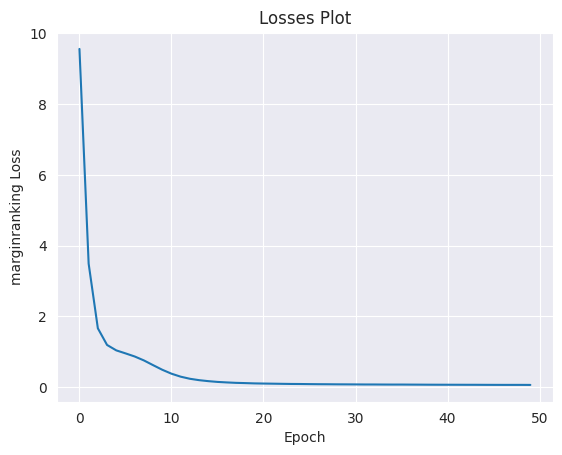

In [ ]:
complex_res.plot_losses()

In [ ]:
hits_at_10 = complex_res.get_metric("hits_at_k")
mean_rank = complex_res.get_metric("mean_rank")
mean_reciprocal_rank = complex_res.get_metric("mean_reciprocal_rank")

print("Hits@10:", hits_at_10)
print("Mean Rank (MR):", mean_rank)
print("Mean Reciprocal Rank (MRR):", mean_reciprocal_rank)

Hits@10: 0.1892323535174494
Mean Rank (MR): 1036.5089111328125
Mean Reciprocal Rank (MRR): 0.07492958754301071


### RotatE Model

In [ ]:
from pykeen.pipeline import pipeline

rotate_res = pipeline(
    training=train_set,
    testing=test_set,
    model='RotatE',
    model_kwargs=dict(embedding_dim=128),
    loss='MarginRankingLoss',
    loss_kwargs=dict(margin=1),
    regularizer='LpRegularizer',
    regularizer_kwargs=dict(p=2, weight=1e-5),
    optimizer='Adam',
    optimizer_kwargs=dict(lr=1e-3),
    random_seed=1,
    device='gpu',
    training_kwargs=dict(num_epochs=50, batch_size=512),
    evaluator='RankBasedEvaluator',
    evaluator_kwargs=dict(metrics=['mean_rank', 'mean_reciprocal_rank', 'hits_at_k']))

INFO:pykeen.pipeline.api:Using device: gpu


Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1715 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=128.


Evaluating on cuda:0:   0%|          | 0.00/219k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 271.60s seconds


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

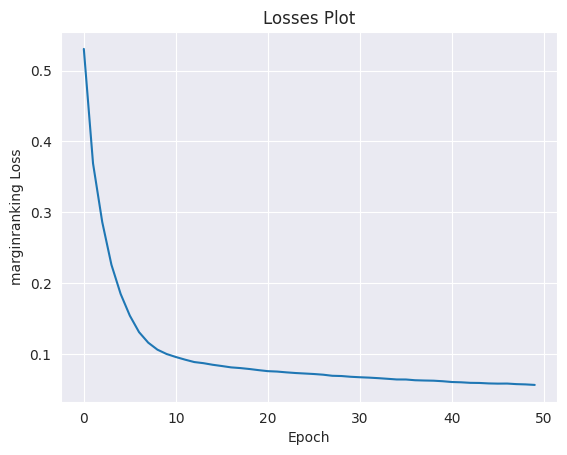

In [ ]:
rotate_res.plot_losses()

In [ ]:
hits_at_10 = rotate_res.get_metric("hits@10")
mean_rank = rotate_res.get_metric("mean_rank")
mean_reciprocal_rank = rotate_res.get_metric("mean_reciprocal_rank")

print("Hits@10:", hits_at_10)
print("Mean Rank (MR):", mean_rank)
print("Mean Reciprocal Rank (MRR):", mean_reciprocal_rank)

Hits@10: 0.4498412033007842
Mean Rank (MR): 415.4286804199219
Mean Reciprocal Rank (MRR): 0.23591795563697812


### Compare Models

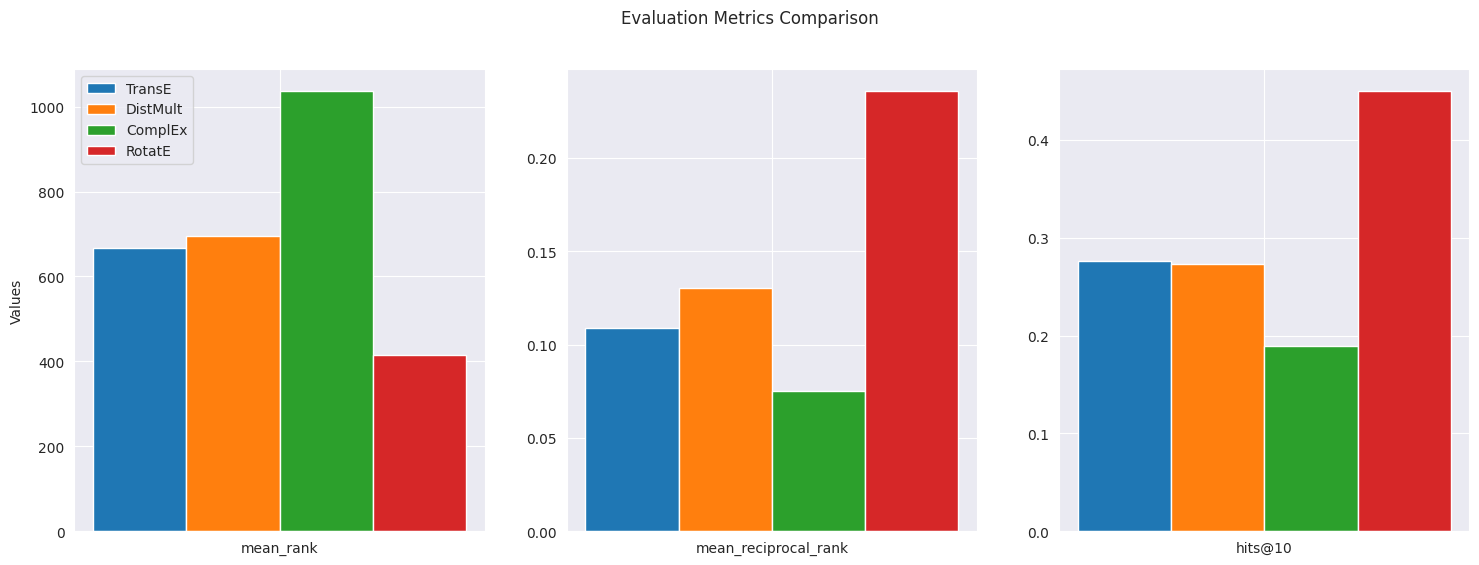

In [ ]:
# Define the metrics and models
metrics = ['mean_rank', 'mean_reciprocal_rank', 'hits@10']
models = ['TransE', 'DistMult', 'ComplEx', 'RotatE']

# Create an array with the metric values for each model
data = np.array([
    [transe_res.get_metric(m) for m in metrics],
    [distmult_res.get_metric(m) for m in metrics],
    [complex_res.get_metric(m) for m in metrics],
    [rotate_res.get_metric(m) for m in metrics],
])

# Create the bar charts
num_metrics = len(metrics)
bar_width = 0.2
x = np.arange(num_metrics)

fig, axes = plt.subplots(1, num_metrics, figsize=(18, 6), sharey=False)

for i, metric in enumerate(metrics):
    for j, model in enumerate(models):
        axes[i].bar(j * bar_width, data[j][i], width=bar_width, label=model if i == 0 else None)
    axes[i].set_xticks([bar_width * (len(models) - 1) / 2])
    axes[i].set_xticklabels([metric])

axes[0].set_ylabel('Values')
fig.suptitle('Evaluation Metrics Comparison')

axes[0].legend()
plt.show()


Save pipeline results to disk

In [ ]:
rotate_res.save_to_directory(fp+"rotate_pipeline_result")
transe_res.save_to_directory(fp+"transe_pipeline_result")
complex_res.save_to_directory(fp+"complex_pipeline_result")
distmult_res.save_to_directory(fp+"distmult_pipeline_result")

### Reduce RotatE Embeddings to 2D

In [ ]:
rotate_model = rotate_res.model

# Get the entity embeddings
rotate_embeddings = rotate_model.entity_representations[0](indices=None).detach().cpu().numpy()

# Separate real and imaginary parts of complex embeddings
rotate_embeddings_real = rotate_embeddings.real
rotate_embeddings_imag = rotate_embeddings.imag

# Stack real and imaginary parts to create a new embeddings matrix
rotate_embeddings_stacked = np.hstack([rotate_embeddings_real, rotate_embeddings_imag])

# Apply TSNE
tsne = TSNE(n_components=2, random_state=42)
rotate_embeddings_2d = tsne.fit_transform(rotate_embeddings_stacked)

### TSNE Plot

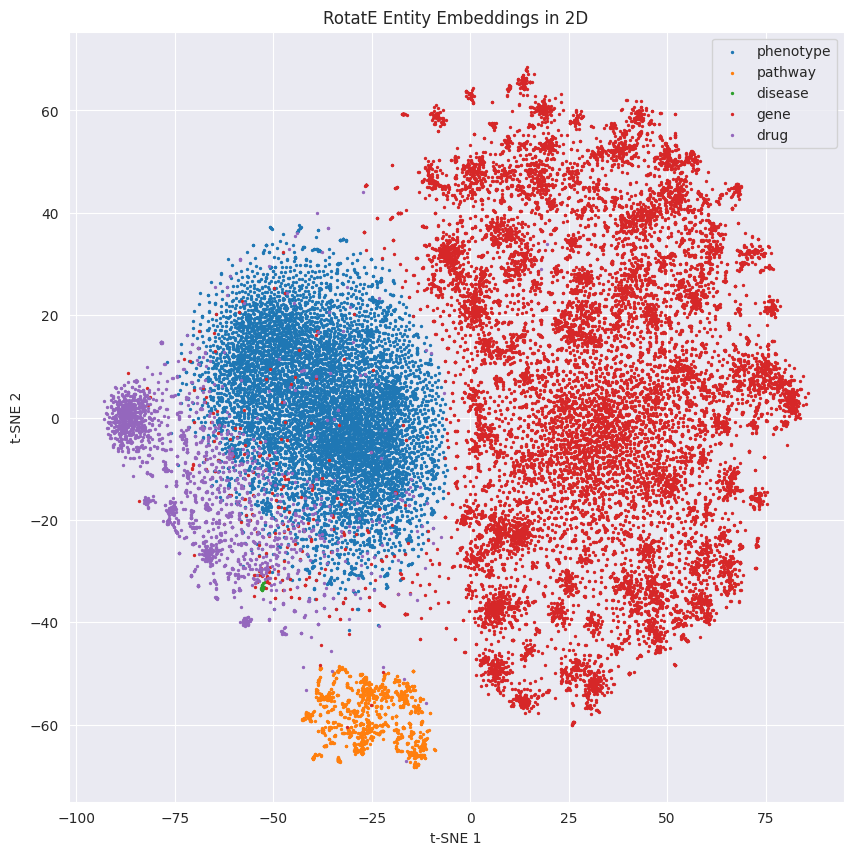

In [ ]:
import matplotlib.pyplot as plt

unique_labels = list(set(true_labels))

fig, ax = plt.subplots(figsize=(10, 10))
for label in unique_labels:
    mask = np.array(true_labels) == label
    ax.scatter(rotate_embeddings_2d[mask, 0], rotate_embeddings_2d[mask, 1], s=2, label=label)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("RotatE Entity Embeddings in 2D")
ax.legend()
plt.show()

### Link Prediction Task
The model predicts head entities that most likely complete the missing link in (?, treats, AD)

It scores all entities in the training set and rank them based on highest scores.

In [ ]:
from pykeen.predict import predict_target

pred = predict_target(
    model = rotate_res.model,
    relation = "treats",
    tail = "MESH:D000544",
    triples_factory = train_set
)


### Filter Predictions
Removes head entities present in knowledge graph for the target relation (treats)

In [ ]:
pred_filtered = pred.filter_triples(train_set)
df = pred_filtered.df
df.head(10)

head_id     score  head_label
34         34 -6.232772    103-90-2
465       465 -6.411077    154-93-8
1004     1004 -6.437199    439-14-5
1996     1996 -6.441869    989-51-5
1997     1997 -6.457176     99-66-1
1669     1669 -6.478298    768-94-5
547       547 -6.484865   1744-22-5
1416     1416 -6.504890    616-91-1
1482     1482 -6.535739  65646-68-6
1411     1411 -6.550652   6104-58-1

- Select Top 100 Predictions

In [ ]:
df = df.head(100).reset_index(drop=True)

- Write top 100 predictions to a file.

In [ ]:
with open(fp+"predicted_drugs.txt", 'w') as f:
    for drug in df.head_label:
        f.write(f"{drug}\n")


### Finally
The predicted drugs will be visualised in Cytoscape or Neo4j. And further validated with transcriptomic data from AD patients vs control.